<a href="https://colab.research.google.com/github/vg25/DA-Coding-Exercise/blob/main/Brands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Creating the dataframes and importing the json files:

df_brands = pd.read_json('brands.json', lines= True)

In [3]:
#Summary of data and to see the data type, memory usage, check if there are any missing values
df_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


In [4]:
#display number of observations and features
df_brands.shape

(1167, 8)

In [5]:
#display top 5 observation of the set
df_brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [6]:
#generate descriptive statistics
df_brands.describe()

,barcode,topBrand
count,1.167000e+03,555.000000
mean,5.111115e+11,0.055856
std,2.874497e+05,0.229850
min,5.111110e+11,0.000000
25%,5.111112e+11,0.000000
50%,5.111114e+11,0.000000
75%,5.111117e+11,0.000000
max,5.111119e+11,1.000000


In [7]:
#number of missing records in each column
df_brands.isnull().sum()

_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
dtype: int64

In [9]:
#calculate the percentage of missing values
(df_brands.isnull().sum()/(len(df_brands)))*100

_id              0.000000
barcode          0.000000
category        13.281919
categoryCode    55.698372
cpg              0.000000
name             0.000000
topBrand        52.442159
brandCode       20.051414
dtype: float64

In [10]:
# Using data types
temporal_columns = df_brands.select_dtypes(include=['datetime64'])

# Using heuristics (checking if column name contains "date" or "time")
temporal_columns = [col for col in df_brands.columns if 'date' in col.lower() or 'time' in col.lower()]

print("Temporal Columns:")
print(temporal_columns)

categorical_columns = []
for col in df_brands.columns:
    if isinstance(df_brands[col][0], (str, bool)):
        categorical_columns.append(col)
print ("Categorical Columns are:")
print(categorical_columns)

# Exclude categorical and temporal columns
non_categorical_temporal_columns = [col for col in df_brands.columns if col not in categorical_columns + temporal_columns]

# Identify continuous columns
continuous_columns = []
for col in non_categorical_temporal_columns:
    if isinstance(df_brands[col][0], (int, float)):
        continuous_columns.append(col)

print("Continuous Columns:")
print(continuous_columns)

# Exclude categorical and temporal columns
non_categorical_temporal_columns = [col for col in df_brands.columns if col not in categorical_columns + temporal_columns]

# Identify discrete columns
discrete_columns = []
for col in non_categorical_temporal_columns:
    if isinstance(df_brands[col][0], int) and df_brands[col].nunique() <= 10:
        discrete_columns.append(col)

print("Discrete Columns:")
print(discrete_columns)


Temporal Columns:
[]
Categorical Columns are:
['category', 'categoryCode', 'name']
Continuous Columns:
['topBrand', 'brandCode']
Discrete Columns:
[]


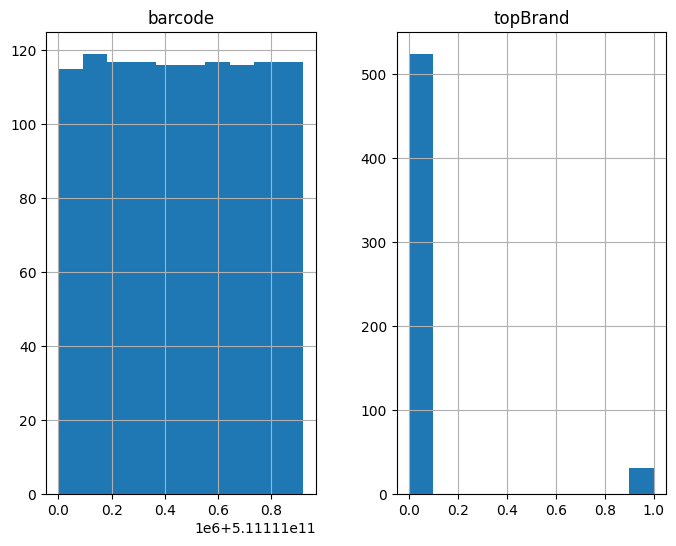

In [11]:
#plot histogram to visualize
df_brands.hist(figsize=(8,6))
plt.show()

In [12]:
#get unique values in column category
unique_categories = df_brands['category'].unique()

print("Unique values in 'category' column:")
print(unique_categories)
# Get the number of unique values in the 'category' column
num_unique_categories = df_brands['category'].nunique()

print("Number of unique values in 'category' column:", num_unique_categories)

Unique values in 'category' column:
['Baking' 'Beverages' 'Candy & Sweets' 'Condiments & Sauces'
 'Canned Goods & Soups' nan 'Magazines' 'Breakfast & Cereal'
 'Beer Wine Spirits' 'Health & Wellness' 'Beauty' 'Baby' 'Frozen'
 'Grocery' 'Snacks' 'Household' 'Personal Care' 'Dairy'
 'Cleaning & Home Improvement' 'Deli' 'Beauty & Personal Care'
 'Bread & Bakery' 'Outdoor' 'Dairy & Refrigerated']
Number of unique values in 'category' column: 23


In [13]:
# Calculate the frequency of each category
category_counts = df_brands['category'].value_counts()

# Calculate the total number of non-null values in the 'category' column
total_non_null_values = df_brands['category'].count()

# Calculate the percentage for each category
category_percentages = (category_counts / total_non_null_values) * 100

# Print the result
print("Category Percentages:")
print(category_percentages)

Category Percentages:
Baking                         36.462451
Beer Wine Spirits               8.893281
Snacks                          7.411067
Candy & Sweets                  7.015810
Beverages                       6.225296
Magazines                       4.347826
Health & Wellness               4.347826
Breakfast & Cereal              3.952569
Grocery                         3.853755
Dairy                           3.260870
Condiments & Sauces             2.667984
Frozen                          2.371542
Personal Care                   1.976285
Baby                            1.778656
Canned Goods & Soups            1.185771
Beauty                          0.889328
Cleaning & Home Improvement     0.592885
Deli                            0.592885
Beauty & Personal Care          0.592885
Household                       0.494071
Bread & Bakery                  0.494071
Dairy & Refrigerated            0.494071
Outdoor                         0.098814
Name: category, dtype: float64


In [14]:
unique_categories_name = df_brands['name'].unique()

print("Unique values in 'name' column:")
print(unique_categories_name)
# Get the number of unique values in the 'name' column
num_unique_categories_name = df_brands['name'].nunique()

print("Number of unique values in 'name' column:", num_unique_categories_name)

Unique values in 'name' column:
['test brand @1612366101024' 'Starbucks' 'test brand @1612366146176' ...
 'test brand @1598639215217' 'LIPTON TEA Leaves'
 'test brand @1613158231643']
Number of unique values in 'name' column: 1156
